# Régression linéaire simple

In [1]:
# DB
import psycopg
import psycopg2

# Data
import pandas as pd
import numpy as np

# Visualisation
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline
from yellowbrick.model_selection import learning_curve

# Machine learning
import sklearn
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
from sklearn.model_selection import validation_curve

# Affichage cellule
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_row', 1000)
from pprint import pprint

# Chargement du model pour déploiement
import pickle
import joblib

## Data Engineering

### Exploration et validation

Compréhension du profilage des données pour obtenir des informations sur le contenu 
et la structure des données

- **Target** : calorie
- **ligne et colonne** : 15000 lignes et 9 colonnes
- **type de variable** : Numérique et catégorique (1)
- **valeur manquante** : Aucune

### Création d'une fonction pour se connecter a la DB via psycopg2

In [2]:
param_dic = {
    "host"      : "localhost",
    "database"  : "diet",
    "user"      : "clement",
    "password"  : "password"
}
def connect(params_dic):
    """ Connect to the PostgreSQL database server """
    conn = None
    try:
        # connect to the PostgreSQL server
        print('Connecting to the PostgreSQL database...')
        conn = psycopg2.connect(**params_dic)
    except (Exception, psycopg2.DatabaseError) as error:
        print(error)
        sys.exit(1) 
    print("Connection successful")
    return conn

### Fonction pour transformer la DB en Dataframe


In [3]:
def postgresql_to_dataframe(conn, select_query, column_names):
    """
    Tranform a SELECT query into a pandas dataframe
    """
    cursor = conn.cursor()
    try:
        cursor.execute(select_query)
    except (Exception, psycopg2.DatabaseError) as error:
        print("Error: %s" % error)
        cursor.close()
        return 1
    
    # Naturally we get a list of tupples
    tupples = cursor.fetchall()
    cursor.close()
    
    # We just need to turn it into a pandas dataframe
    df = pd.DataFrame(tupples, columns=column_names)
    return df

In [4]:
# Connect to the database
conn = connect(param_dic)
column_names = ["user_id","gender", "age", "height", "weight", "duration", "heart_rate", "body_temp", "calorie"]
# Execute the "SELECT *" query
df_db = postgresql_to_dataframe(conn, 
"SELECT persons.user_id as id, gender, age, height, weight, duration, heart_rate, body_temp,calorie FROM calories INNER JOIN persons ON calories.user_id = persons.user_id"
                                , column_names)
df_db.head()

Connecting to the PostgreSQL database...
Connection successful


,user_id,gender,age,height,weight,duration,heart_rate,body_temp,calorie
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


### Exploration et validation

In [ ]:
# A REMPLIR

In [ ]:
#sns.pairplot(df_db)

### Entrainement du model et visualisation de la prédiction

In [74]:
x = df_db.drop(columns=['user_id','calorie'])
y = df_db['calorie']

In [5]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=10)

NameError: name 'x' is not defined

### Étiquetage des données 

In [76]:
le = LabelEncoder()
X_train['gender'] = le.fit_transform(X_train['gender'])
X_test['gender'] = le.fit_transform(X_test['gender'])

## Model Engineering

### Model Training 

In [77]:
model_lineaire = LinearRegression()
model_lineaire.fit(X_train,y_train)
model_lineaire.score(X_test,y_test)

0.9669224838030391

In [78]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(10500, 7)
(10500,)
(4500, 7)
(4500,)


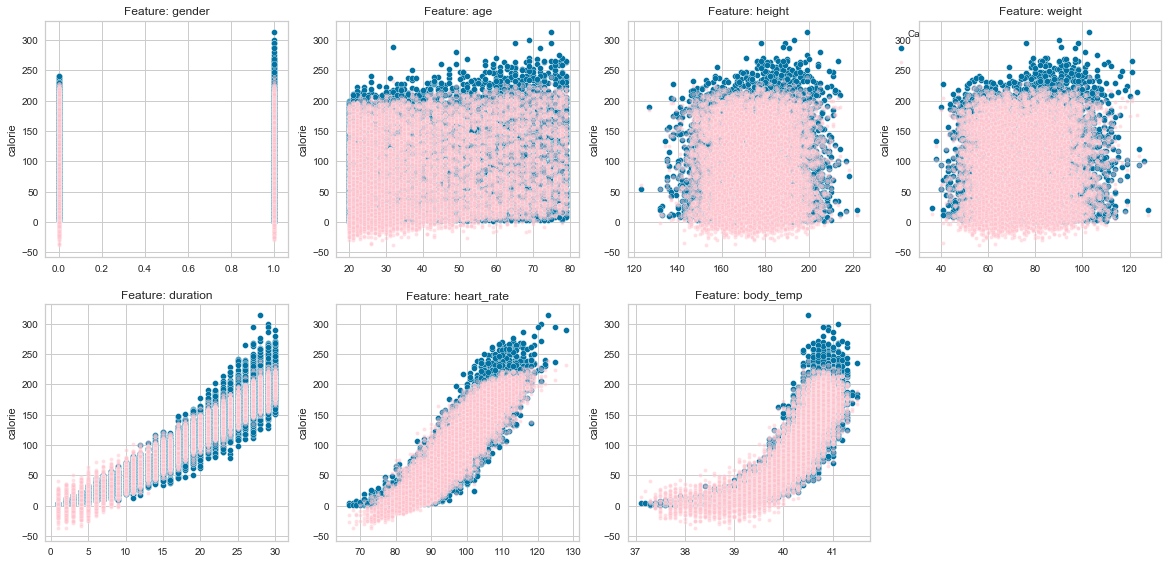

In [79]:
# Calories prédit à partir de xtrain
ypred_train = model_lineaire.predict(X_train)

# créer la figure
fig, axes = plt.subplots(ncols=4, nrows=4, figsize=(20, 20))

# aplatir les axes pour faciliter leur indexation
axes = axes.flatten()

# itérer à travers les valeurs des colonnes, et utiliser i pour indexer les axes
for i, v in enumerate(X_train.columns):
    
    # sélectionner la colonne à tracer
    data = X_train[v]
    
    # Tracez les calories réel en fonction des caractéristiques
    axes[i].scatter(x=data, y=y_train, s=35, ec='white', label='actual')
    
    # Tracer les calories prédites en fonction des caractéristiques
    axes[i].scatter(x=data, y=ypred_train, c='pink', s=15, ec='white', alpha=0.5, label='predicted')

    # définir le titre et l'étiquette y
    axes[i].set(title=f'Feature: {v}', ylabel='calorie')

# definir une legende
axes[2].legend(title='Calories', bbox_to_anchor=(1.05, 1), loc='upper left')

# supprimez les axes inutilisés
for v in range(7, 16):
    fig.delaxes(axes[v])

<span style='color:blue'>Réel </span>

<span style='color:pink'> Prédiction</span>


In [81]:
import seaborn as sns
import pandas as pd
frame = pd.DataFrame(np.c_[X_test[0][:100], y_test.duration[:100]], columns = ['x','y'])
sns.lmplot('x', 'y', frame, ci=85)

AttributeError: 'Series' object has no attribute 'duration'

## Entrainement du model et visualisation de la prédiction : Difficultés rencontré 

In [ ]:
# Je n'arriver pas a afficher les predictions
# Je me suis rendu compte que les dimensions étaient differentes entre mon X et mon y étant donné que mon X 
# contenait 8 features. Pour parer à cela jai itéré a travers les colonnes de X et j'ai indexé.

# J'ai pu afficher mes prédictions pour chaques features

### Test et évaluation du modèle 

<span style='color:red'> RFE (Recursive Feature Elimination)  </span>

**Utilisation de RFE : c'est une méthode de réduction de la dimensionnalité**

L'algorithme de RFE procède au classement des prédicteurs dans l'ordre d'importance en éliminant de manière récursive ceux qui ne sont pas importants, c'est-à-dire qui n'affectent pas la qualité du modèle.

Pour construire le modèle en utilisant RFE, je dois indiquer à RFE combien de caractéristiques je veux dans le modèle final. Il exécute alors un algorithme d'élimination des caractéristiques.

Notez que le nombre de caractéristiques à utiliser dans le modèle est un hyperparamètre.

In [ ]:
#pprint(model_lineaire.get_params())

In [12]:
# Regardez les paramètres utilisés par mon random forest
print('Parametre utilisés:\n')
pprint(model_lineaire.get_params())

Parametre utilisés:

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': 'deprecated',
 'positive': False}


In [14]:
copy_X = [True, False]
fit_intercept = [True, False]
positive = [True, False]
normalize = [True, False]

In [15]:
# Create the random grid
random_grid = {'copy_X': copy_X,
               'fit_intercept': fit_intercept,
               'positive': positive,
               'normalize': normalize,
}
pprint(random_grid)

{'copy_X': [True, False],
 'fit_intercept': [True, False],
 'normalize': [True, False],
 'positive': [True, False]}


In [31]:
lr = LinearRegression()
lr_random = RandomizedSearchCV(estimator = lr, param_distributions = random_grid, n_iter = 30, cv = 5, verbose=2, random_state=42, n_jobs = -1)
# Fit le model  random 
lr_random.fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


RandomizedSearchCV(cv=5, estimator=LinearRegression(), n_iter=30, n_jobs=-1,
                   param_distributions={'copy_X': [True, False],
                                        'fit_intercept': [True, False],
                                        'normalize': [True, False],
                                        'positive': [True, False]},
                   random_state=42, verbose=2)

In [33]:
lr_random.best_params_

{'positive': False, 'normalize': True, 'fit_intercept': True, 'copy_X': True}

In [ ]:
#model_lineaire.fit(X_train,y_train)
#model_lineaire.score(X_test,y_test)

In [34]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy

In [42]:
lr_random.fit(X_train, y_train)
base_accuracy = evaluate(lr_random, X_test, y_test)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Model Performance
Average Error: 8.4246 degrees.
Accuracy = 70.40%.


In [43]:
lr_random.best_estimator_

LinearRegression(normalize=True)

In [44]:
best_random = lr_random.best_estimator_
random_accuracy = evaluate(best_random, X_test, y_test)

Model Performance
Average Error: 8.4246 degrees.
Accuracy = 70.40%.


In [45]:
print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))

Improvement of 0.00%.


In [61]:
param_grid = {'normalize': [True], 
              'fit_intercept': [True], 
              'copy_X': [True]}

In [63]:
grid_search = GridSearchCV(estimator = lr, param_grid = param_grid, 
                          cv = 5, n_jobs = -1, verbose = 2)

In [69]:
grid_search.best_params_

{'copy_X': True, 'fit_intercept': True, 'normalize': True}

In [64]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


GridSearchCV(cv=5, estimator=LinearRegression(), n_jobs=-1,
             param_grid={'copy_X': [True], 'fit_intercept': [True],
                         'normalize': [True]},
             verbose=2)

In [65]:
grid_search.best_params_

{'copy_X': True, 'fit_intercept': True, 'normalize': True}

In [ ]:
#model_lineaire.fit(X_train,y_train)
#model_lineaire.score(X_test,y_test)

In [66]:
best_grid = grid_search.best_estimator_
grid_accuracy = evaluate(best_grid, X_test,y_test)

Model Performance
Average Error: 8.4246 degrees.
Accuracy = 70.40%.


In [ ]:
print('Improvement of {:0.2f}%.'.format( 100 * (grid_accuracy - base_accuracy) / base_accuracy))